In [48]:
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [49]:
def beta(t,y):
    yp0 = ((41*y[0]**2)/3 + (199*y[0]**3)/(36*np.pi) + (9*y[0]**2*y[1])/(4*np.pi) + (22*y[0]**2*y[2])/(3*np.pi) - (17*y[0]**2*y[5])/(12*np.pi))/(4*np.pi)
    yp1 = (-(19/3)*y[1]**2 + (3*y[0]*y[1]**2)/(4*np.pi) + (35*y[1]**3)/(12*np.pi) + (6*y[1]**2*y[2])/np.pi - (3*y[1]**2*y[5])/(4*np.pi))/(4*np.pi)
    yp2 = (-14*y[2]**2 + (11*y[0]*y[2]**2)/(12*np.pi) + (9*y[1]*y[2]**2)/(4*np.pi) - (13*y[2]**3)/np.pi - (y[2]**2*y[5])/np.pi)/(4*np.pi)
    yp3 = (3*y[0]**2)/8 - (379*y[0]**3)/(192*np.pi) + 3/4*y[0]*y[1] - (559*y[0]**2*y[1])/(192*np.pi) + (9*y[1]**2)/8 - (289*y[0]*y[1]**2)/(192*np.pi) + (305*y[1]**3)/(64*np.pi) - (3*y[0]*y[3])/(4*np.pi) + (629*y[0]**2*y[3])/(384*np.pi**2) - (9*y[1]*y[3])/(4*np.pi) + (39*y[0]*y[1]*y[3])/(64*np.pi**2) - (73*y[1]**2*y[3])/(128*np.pi**2) + (3*y[3]**2)/(2*np.pi**2) + (9*y[0]*y[3]**2)/(16*np.pi**3) + (27*y[1]*y[3]**2)/(16*np.pi**3) - (39*y[3]**3)/(32*np.pi**4) - (19*y[0]**2*y[5])/(16*np.pi) + (21*y[0]*y[1]*y[5])/(8*np.pi) - (9*y[1]**2*y[5])/(16*np.pi) + (3*y[3]*y[5])/np.pi + (85*y[0]*y[3]*y[5])/(96*np.pi**2) + (45*y[1]*y[3]*y[5])/(32*np.pi**2) + (5*y[2]*y[3]*y[5])/np.pi**2 - (9*y[3]**2*y[5])/(4*np.pi**3) - 6*y[5]**2 - (2*y[0]*y[5]**2)/(3*np.pi) - (8*y[2]*y[5]**2)/np.pi - (3*y[3]*y[5]**2)/(16*np.pi**2) + (15*y[5]**3)/(2*np.pi)
    yp4 = -((3*y[0]*y[4])/(8*np.pi)) + (557*y[0]**2*y[4])/(768*np.pi**2) - (9*y[1]*y[4])/(8*np.pi) + (15*y[0]*y[1]*y[4])/(128*np.pi**2) - (145*y[1]**2*y[4])/(256*np.pi**2) + (3*y[3]*y[4])/(4*np.pi**2) + (3*y[0]*y[3]*y[4])/(8*np.pi**3) + (9*y[1]*y[3]*y[4])/(8*np.pi**3) - (15*y[3]**2*y[4])/(64*np.pi**4) + (3*y[4]*y[5])/(2*np.pi) + (85*y[0]*y[4]*y[5])/(192*np.pi**2) + (45*y[1]*y[4]*y[5])/(64*np.pi**2) + (5*y[2]*y[4]*y[5])/(2*np.pi**2) - (9*y[3]*y[4]*y[5])/(8*np.pi**3) - (27*y[4]*y[5]**2)/(32*np.pi**2)
    yp5 = -((17*y[0]*y[5])/(24*np.pi)) + (1187*y[0]**2*y[5])/(1728*np.pi**2) - (9*y[1]*y[5])/(8*np.pi) - (3*y[0]*y[1]*y[5])/(32*np.pi**2) - (23*y[1]**2*y[5])/(32*np.pi**2) - (4*y[2]*y[5])/np.pi + (19*y[0]*y[2]*y[5])/(72*np.pi**2) + (9*y[1]*y[2]*y[5])/(8*np.pi**2) - (27*y[2]**2*y[5])/(2*np.pi**2) + (3*y[3]**2*y[5])/(64*np.pi**4) + (9*y[5]**2)/(4*np.pi) + (131*y[0]*y[5]**2)/(128*np.pi**2) + (225*y[1]*y[5]**2)/(128*np.pi**2) + (9*y[2]*y[5]**2)/(2*np.pi**2) - (3*y[3]*y[5]**2)/(8*np.pi**3) - (3*y[5]**3)/(2*np.pi**2)
    yp = np.array([yp0, yp1, yp2, yp3, yp4, yp5])
    return yp

t0 = 5.09298
tf = 66.9573
a1_def = 0.0102772
a2_def = 0.0333685
a3_def = 0.108301
l_def = 0.1271
m2_def = -7704.1
at_def = 0.069655
y0 = jnp.array([a1_def, a2_def, a3_def, l_def, m2_def, at_def])

In [50]:
y0[3]

XlaRuntimeError: UNKNOWN: <unknown>:0: error: 'func.func' op One or more function input/output data types are not supported.
<unknown>:0: note: see current operation: 
"func.func"() <{arg_attrs = [{mhlo.sharding = "{replicated}"}, {mhlo.sharding = "{replicated}"}], function_type = (tensor<6xf64>, tensor<i64>) -> tensor<1xf64>, res_attrs = [{}], sym_name = "main", sym_visibility = "public"}> ({
^bb0(%arg0: tensor<6xf64>, %arg1: tensor<si64>):
  %0 = "mhlo.dynamic_slice"(%arg0, %arg1) {slice_sizes = dense<1> : tensor<1xi64>} : (tensor<6xf64>, tensor<si64>) -> tensor<1xf64>
  "func.return"(%0) : (tensor<1xf64>) -> ()
}) : () -> ()
<unknown>:0: error: failed to legalize operation 'func.func'
<unknown>:0: note: see current operation: 
"func.func"() <{arg_attrs = [{mhlo.sharding = "{replicated}"}, {mhlo.sharding = "{replicated}"}], function_type = (tensor<6xf64>, tensor<i64>) -> tensor<1xf64>, res_attrs = [{}], sym_name = "main", sym_visibility = "public"}> ({
^bb0(%arg0: tensor<6xf64>, %arg1: tensor<si64>):
  %0 = "mhlo.dynamic_slice"(%arg0, %arg1) {slice_sizes = dense<1> : tensor<1xi64>} : (tensor<6xf64>, tensor<si64>) -> tensor<1xf64>
  "func.return"(%0) : (tensor<1xf64>) -> ()
}) : () -> ()


In [34]:
soln = solve_ivp(beta, (t0,tf), y0, t_eval=np.linspace(t0,tf,1000))
ts = soln.t
ys = soln.y

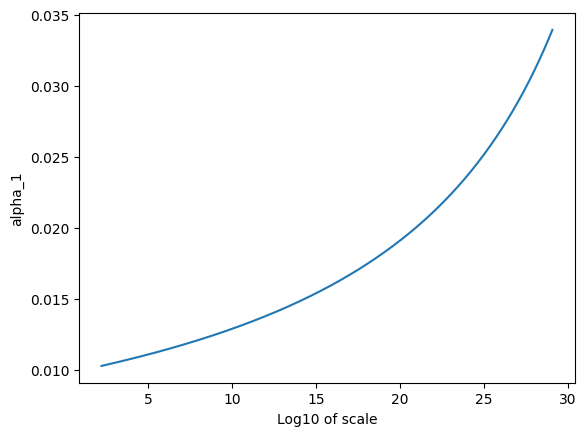

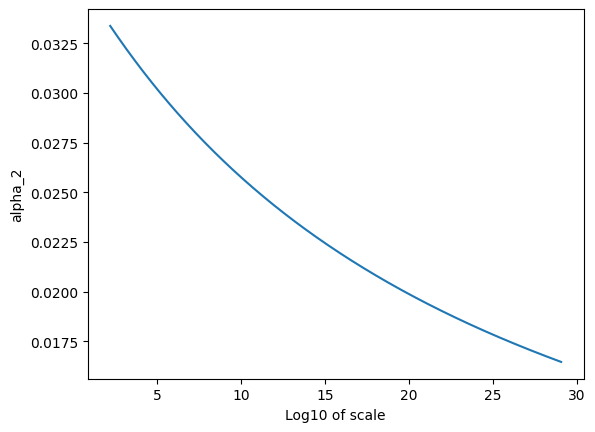

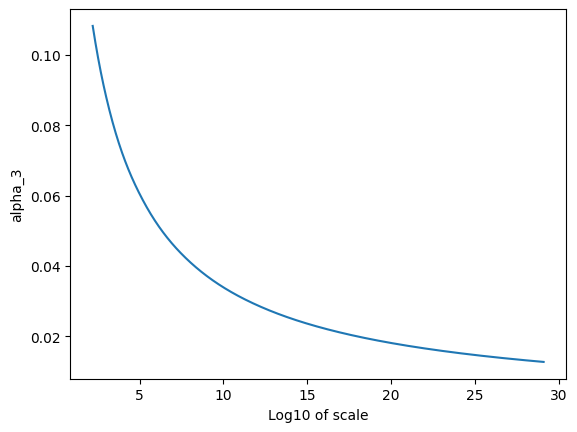

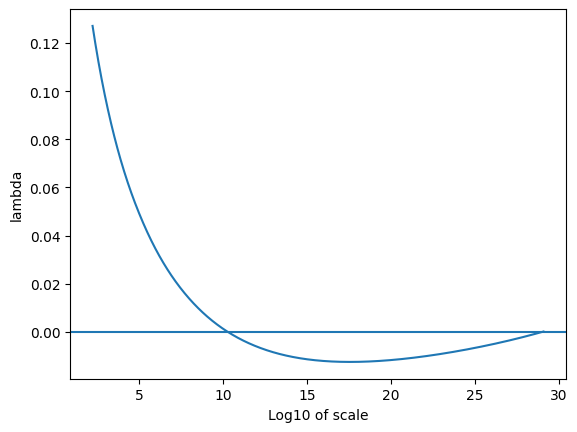

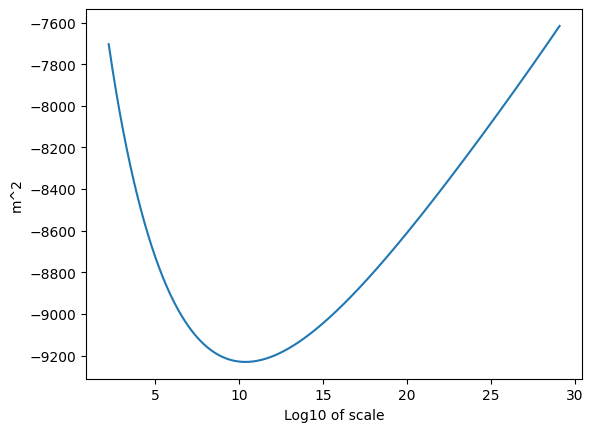

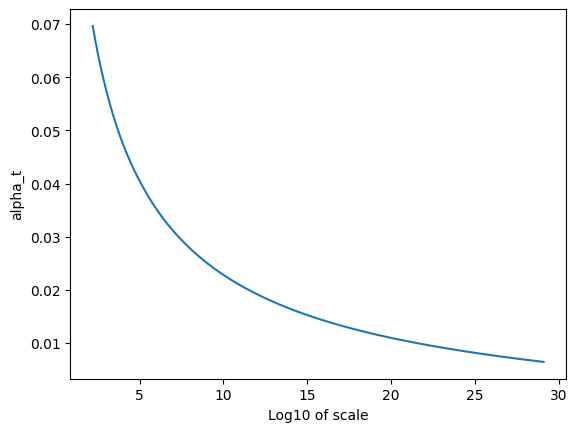

In [35]:
labels = ["alpha_1", "alpha_2", "alpha_3", "lambda", "m^2", "alpha_t"]
ts_log_10 = ts*np.log10(np.exp(1))
for i in range(len(labels)):
    plt.plot(ts_log_10, ys[i,:])
    plt.xlabel("Log10 of scale")
    plt.ylabel(labels[i])
    if i == 3:
        plt.axhline(0)
    plt.show()

In [36]:
def veff(scales, m2s, lams, Lam):
    return -1/4*m2s*np.exp(2*scales) + 1/4*lams*np.exp(4*scales) + 1/(6*Lam**2)*np.exp(6*scales)

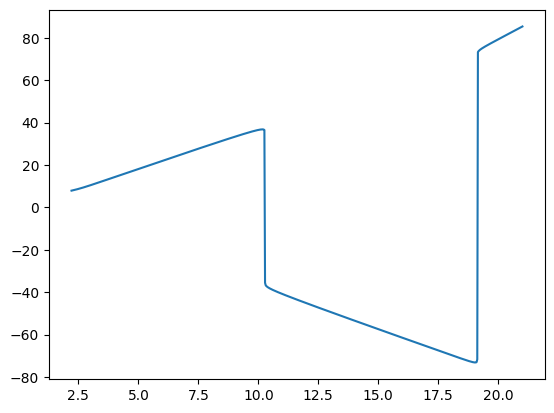

In [47]:
veffs = veff(ts, ys[4,:], ys[3,:], Lam=10**20)
plt.plot((ts*np.log10(np.exp(1)))[0:700], ((np.sign(veffs)*np.log(np.abs(veffs) + 1))*np.log10(np.exp(1)))[0:700])